<a href="https://colab.research.google.com/github/shreenahMac/Assignment2-ISYS2001/blob/main/Enron_Data_Business_Report_Shreenah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ENRON EMAIL ANALYSIS - Business Report**




Student Name: Marcharchand Shreenah 


Student ID: 21013681

Lecturer Name: Ramchurn Navishna

Workshop Time: Monday, 13.40-15.50 

# Downloading Enron Email Data



### Full/Complete Dataset

The following code-cell will download the complete Enron email database to the Colab instance.  It will take about 1-2 mins to download.

In [24]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-23 09:57:49--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2a01:111:f402:f043::39
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-23 09:57:50--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  34.9MB/s    in 25s     

2023-05-23 09:58:15 (3

**Importing Modules and Connecting Database**

In [25]:
import sqlite3

In [26]:
conn = sqlite3.connect("enron.db")

In [27]:
cur = conn.cursor()

**Check schema of database**

In [28]:
sql="""
SELECT name
FROM sqlite_master
WHERE type='table';
"""

cur.execute(sql)
cur.fetchall()

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

**Check schema of tables**

Schema of employeelist 

In [34]:
#Check Schema of table employeelist using PRAGMA
sql="""
PRAGMA table_info('employeelist');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'eid', 'INTEGER', 1, None, 1),
 (1, 'firstName', 'VARCHAR(31)', 1, "''", 0),
 (2, 'lastName', 'VARCHAR(31)', 1, "''", 0),
 (3, 'Email_id', 'VARCHAR(31)', 1, "''", 0),
 (4, 'Email2', 'VARCHAR(31)', 0, None, 0),
 (5, 'Email3', 'VARCHAR(31)', 0, None, 0),
 (6, 'EMail4', 'VARCHAR(31)', 0, None, 0),
 (7, 'folder', 'VARCHAR(31)', 1, "''", 0),
 (8, 'status', 'VARCHAR(50)', 0, None, 0)]

Schema of message 

In [35]:
#Check Schema of table message using PRAGMA
sql="""
PRAGMA table_info('message');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'mid', 'INTEGER', 1, "'0'", 1),
 (1, 'sender', 'VARCHAR(127)', 1, "''", 0),
 (2, 'date', 'DATETIME', 0, None, 0),
 (3, 'message_id', 'VARCHAR(127)', 0, None, 0),
 (4, 'subject', 'TEXT', 0, None, 0),
 (5, 'body', 'TEXT', 0, None, 0),
 (6, 'folder', 'VARCHAR(127)', 1, "''", 0)]

Schema of recipientinfo

In [36]:
#Check Schema of table recipientinfo using PRAGMA
sql="""
PRAGMA table_info('recipientinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

Schema of referenceinfo 

In [37]:
#Check Schema of table referenceinfo using PRAGMA
sql="""
PRAGMA table_info('referenceinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

**Fetching data from tables**

In [ ]:
#Fetch all data from table employeelist
sql = '''
SELECT *
FROM employeelist;
'''
cur.execute(sql)
rows=cur.fetchall()
for row in rows:
  print(row)


In [39]:
#Fetch all data from table message
sql = '''
SELECT *
FROM message;
'''
cur.execute(sql)
rows=cur.fetchall()

#for row in rows:
 # print(row)

In [40]:
#Fetch all data from table recipientinfo
sql = '''
SELECT *
FROM recipientinfo;
'''
cur.execute(sql)
rows=cur.fetchall()

#for row in rows:
 # print(row)

In [41]:
#Fetch all data from table referenceinfo
sql = '''
SELECT *
FROM referenceinfo;
'''
cur.execute(sql)
rows=cur.fetchall()

#for row in rows:
 # print(row)

**PANDA**

 **Using Pandas library to read database and load data into a dataframe**

In [ ]:
import pandas as pd

sql='''
SELECT * from employeelist;
'''
# Load the data into a DataFrame
employeelist_df = pd.read_sql_query(sql, conn)
employeelist_df

In [ ]:
import pandas as pd

sql='''
SELECT * from message;
'''
# Load the data into a DataFrame
message_df = pd.read_sql_query(sql, conn)
message_df

In [ ]:
import pandas as pd

sql='''
SELECT * from recipientinfo;
'''
# Load the data into a DataFrame
recipientinfo_df = pd.read_sql_query(sql, conn)
recipientinfo_df

In [ ]:
import pandas as pd

sql='''
SELECT * from referenceinfo;
'''
# Load the data into a DataFrame
referenceinfo_df = pd.read_sql_query(sql, conn)
referenceinfo_df

**Data Manipulation**

# Email Traffic overtime

In [46]:
import sqlite3

In [47]:
import pandas as pd

In [48]:
import matplotlib.pyplot as plt

In [64]:
import seaborn as sns

In [50]:
#Check whether the data column in Message contain null values
sql= """
SELECT date
FROM message
"""



In [51]:
#convert to dataframe
import pandas as pd
message_df = pd.read_sql_query(sql, conn)
message_df

,date
0,2000-01-21 04:51:00
1,2000-01-24 01:37:00
2,2000-01-24 02:06:00
3,2000-02-02 10:21:00
4,2000-02-07 22:16:00
...,...
252754,2002-02-06 16:51:29
252755,2002-02-06 17:17:39
252756,2002-02-06 20:09:37
252757,2002-02-07 04:38:13


In [62]:
#sql query to count number of emails per day
sql="""

SELECT strftime('%Y-%m-%d', date) 
AS date,
COUNT(*) AS count FROM message 
GROUP BY date

"""
#convert in dataframe
messageperday_df = pd.read_sql_query(sql, conn)
messageperday_df

,date,count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
194082,2020-12-29,1
194083,2043-12-28,1
194084,2044-01-02,1
194085,2044-01-04,1


<Axes: xlabel='date', ylabel='count'>

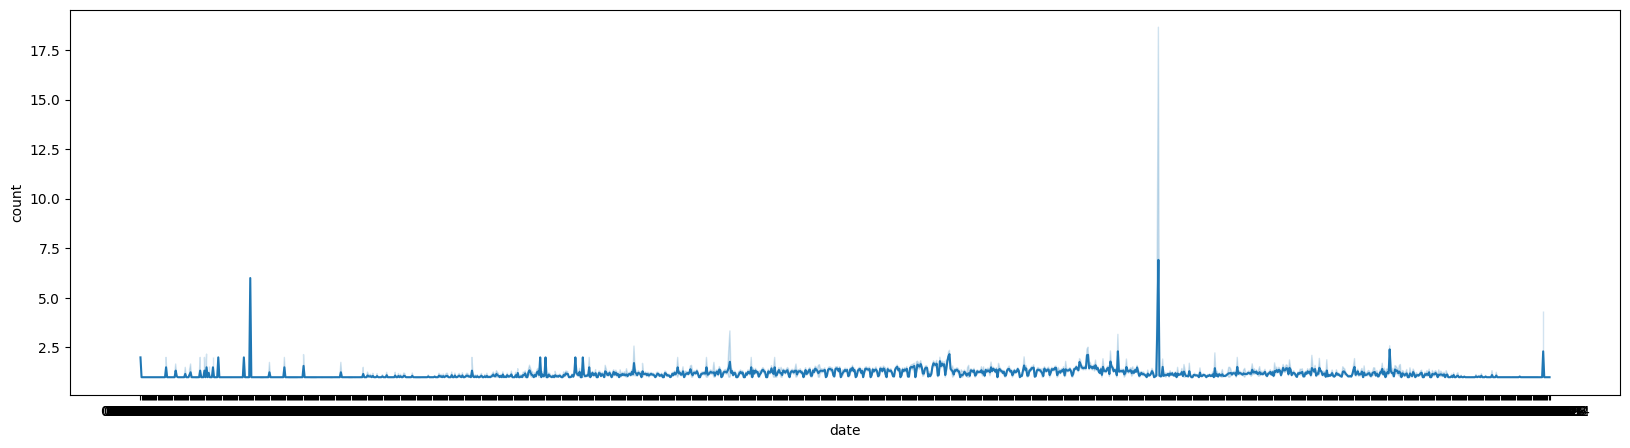

In [65]:
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x = 'date', y='count', data = messageperday_df)

Analysis:
what can be concluded about this graph is that it demonstrate the Enron Corporation's daily email communication pattern. The graph's peaks and dips show times when daily email activity grew or decreased. It can assist in locating important occasions or intervals that significantly affected email volume. 


In [66]:
##sql query to count number of emails per week
sql="""

SELECT strftime('%Y,%w', date) 
AS date,
COUNT(*) AS count FROM message 
GROUP by date


"""
#convert in dataframe
messageperweek_df = pd.read_sql_query(sql, conn)
messageperweek_df

,date,count
0,"0001,3",2
1,"0001,1",1
2,"0001,2",1
3,"0001,3",1
4,"0001,1",1
...,...,...
194082,"2020,2",1
194083,"2043,1",1
194084,"2044,6",1
194085,"2044,1",1


<Axes: xlabel='date', ylabel='count'>

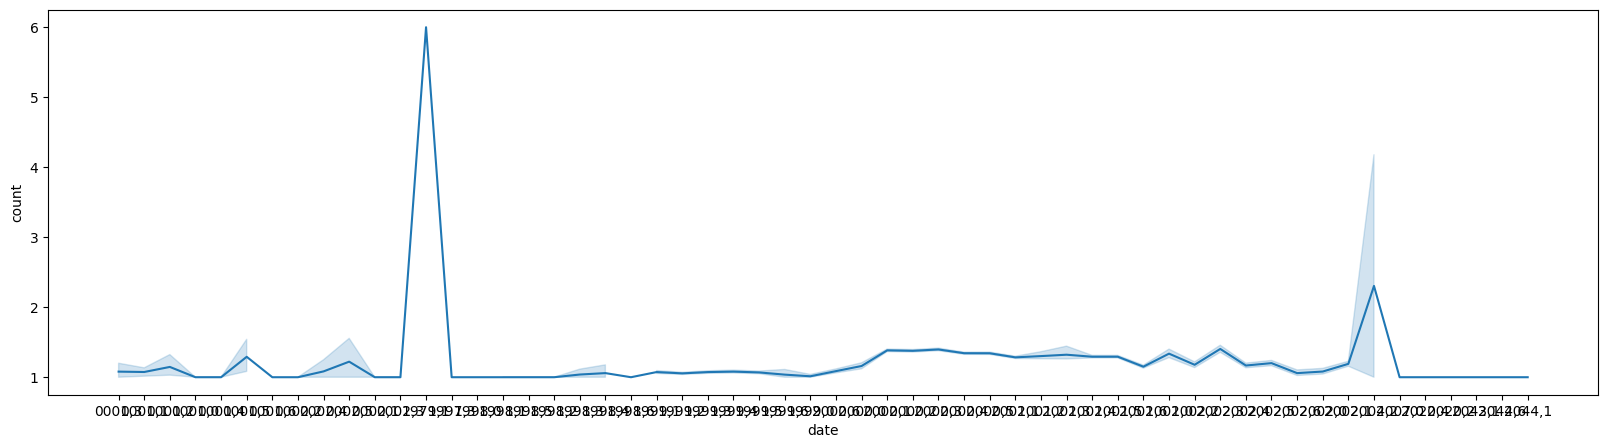

In [80]:
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x = 'date', y='count', data = messageperweek_df)

**Analysis messageperweek and the line graph**
The graph demonstrates that the mailing cycle experienced a considerable early boost before rapidly and noticeably declining later on. Then, for a brief period in the late cycle, it peaked once more. 


In [83]:
#sql query to count number of emails per month
sql="""

SELECT strftime('%Y, %m', date) 
AS date,
COUNT(*) AS count FROM message 
GROUP by date


"""
#convert in dataframe
messagepermonth_df = pd.read_sql_query(sql, conn)
messagepermonth_df

,date,count
0,"0001, 05",2
1,"0001, 06",1
2,"0001, 07",1
3,"0001, 08",1
4,"0001, 08",1
...,...,...
194082,"2020, 12",1
194083,"2043, 12",1
194084,"2044, 01",1
194085,"2044, 01",1


<Axes: xlabel='date', ylabel='count'>

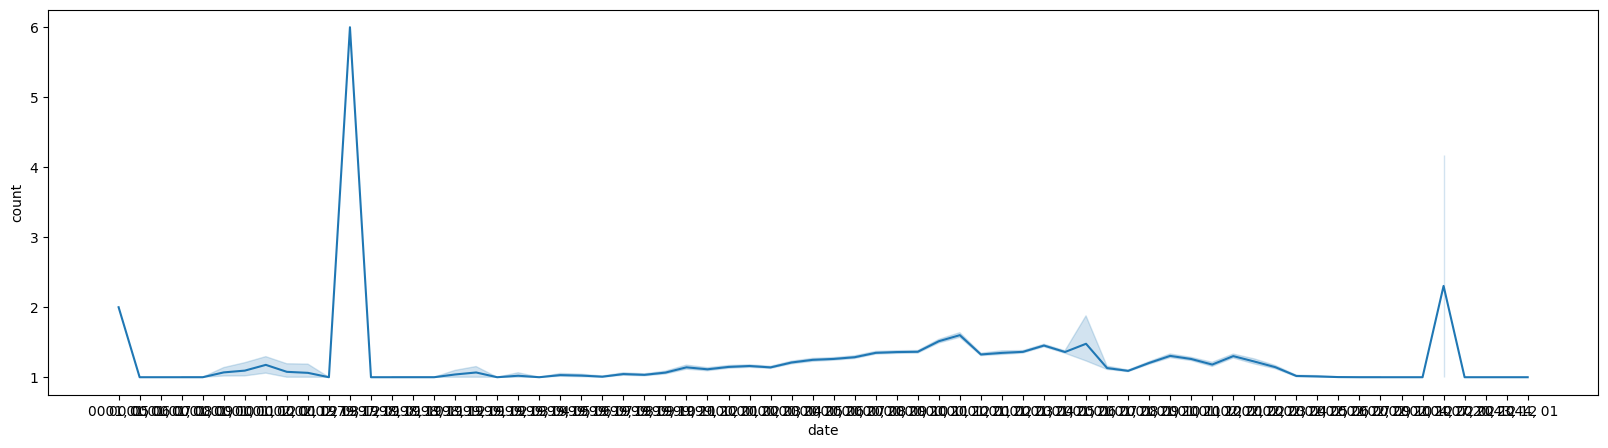

In [84]:
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x = 'date', y='count', data = messagepermonth_df)








**Analysis of the monthly graph**
According to the monthly graph, emailing was done most frequently in the beginning of the cycle.As mentioned in the case study, the company's quick growth is what caused the peak in email activity early on. 

#**Top senders and recipients**

In [72]:
#sql query to retrieve top senders 
sql_senders = """
SELECT sender, COUNT(*) 
AS count 
FROM message 
GROUP BY sender 
ORDER BY count 
DESC
LIMIT 10 
"""

In [73]:
#read data from the dataframe into dataframes 
top_senders_df = pd.read_sql_query(sql_senders, conn)
top_senders_df 


,sender,count
0,jeff.dasovich@enron.com,6273
1,j.kaminski@enron.com,5838
2,kay.mann@enron.com,5100
3,sara.shackleton@enron.com,4797
4,tana.jones@enron.com,4437
5,chris.germany@enron.com,3686
6,no.address@enron.com,3511
7,enron.announcements@enron.com,2838
8,matthew.lenhart@enron.com,2784
9,debra.perlingiere@enron.com,2549


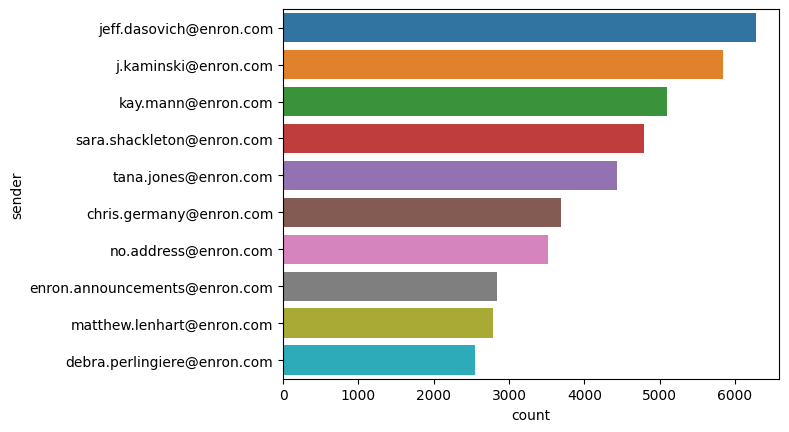

In [77]:
import matplotlib.pyplot as plt 
import seaborn as sns 
data = top_senders_df 
sns.barplot(x= "count", y= "sender", data=data)
plt.show() 

**Analysis**
The top ten senders of the dataset are shown in the bar chart above, with "jeff.dasovish@enron.com" as the top sender with the most emails sent. with precisely 2549 emails sent, "debra.perlingiere@enron.com" has the fewest emails sent among the top ten senders. with the use of this bar chart, i was able to visually analyse the various participants in the emailing activity and determine who sent the most emails. 

In [85]:
#sql query to count the number of emails received by each recipients 
sql_recipients = """
SELECT rvalue AS recipient,  COUNT(*) 
AS count 
FROM  recipientinfo

GROUP BY recipient 
ORDER BY count DESC 
LIMIT 20
"""

In [86]:
conn = sqlite3.connect("enron.db")
#read data from the database into dataframes 
top_recipients_df = pd.read_sql_query(sql_recipients, conn)
top_recipients_df 


,recipient,count
0,no.address@enron.com,19198
1,jeff.dasovich@enron.com,11137
2,richard.shapiro@enron.com,11015
3,steven.j.kean@enron.com,10873
4,james.d.steffes@enron.com,10615
5,tana.jones@enron.com,9781
6,sara.shackleton@enron.com,9633
7,mark.e.taylor@enron.com,9090
8,louise.kitchen@enron.com,7603
9,pete.davis@enron.com,7509


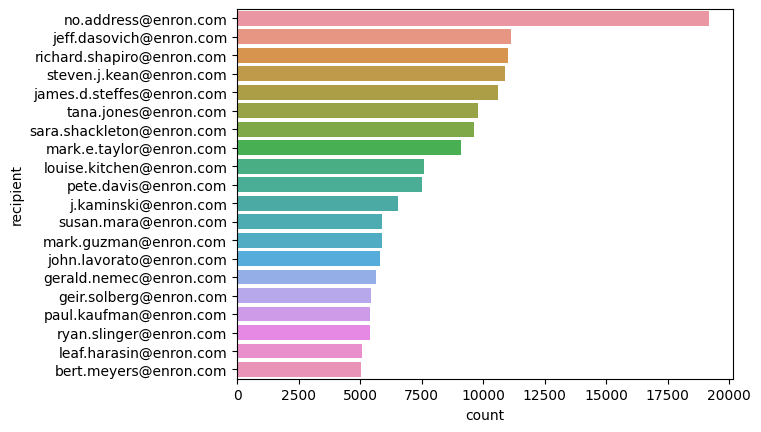

In [87]:
import matplotlib.pyplot as plt 
import seaborn as sns 
data = top_recipients_df 
sns.barplot(x= "count", y= "recipient", data=data)
plt.show() 

**Analysis**: The top twenty recipients of the dataset are shown in the bar graph above, with "no.address@enron.com" as the top receiver and "no.address@enron.com" as the recipient with the most email received. there are exactly 19198 emails.With exactly 5049 emails delivered, "bert.meyers@enron.com" has the fewest emails among the top twenty receivers. this bar chart made it easier for me to visually analyse the various participants in the emailing activity and determine who received the most emails 

**Email distribution by recipient type** 

In [91]:
#sql query to retrive recipient types and their counts 
sql_recipients_types = """
SELECT rtype, COUNT(rtype) 
AS count

FROM recipientinfo 

GROUP by rtype
ORDER by rtype 
"""

cur.execute(sql_recipients_types)
recipient_df = pd.read_sql_query(sql_recipients_types, conn)
recipient_df 

,rtype,count
0,BCC,253713
1,CC,253735
2,TO,1556994


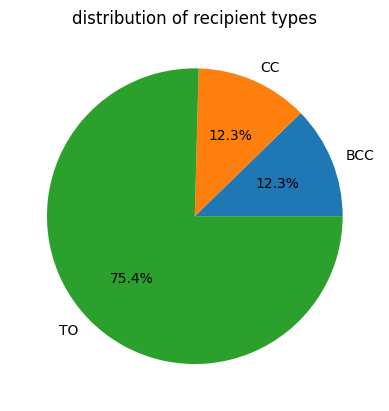

In [95]:
#create a list of labels for the pie chart 
labels = recipient_df['rtype']

#create a list of values for the pie chart 
values = recipient_df['count']

#plot the pie chart 
plt.pie(values, labels=labels, autopct='%1.1f%%')

plt.title('distribution of recipient types')
plt.show()

**Analysis** 
by examining the pie chart above, we can see that the "TO" field received the majority of the email distribution with 75.4% while the "CC" and "BCC" fields were evenly dispersed, each 12.3%. 